In [1]:
import os
import argparse
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
%matplotlib widget
from pprint import pprint

from config import EMBEDDINGS_DIR

In [2]:
dataset_name = 'wtc'
sbert_name = 'all-MiniLM-L12-v2'
model_name = 'whisper-384'

In [31]:
seg_path = f'/cronus_data/rrao/{dataset_name if dataset_name == "hitop" else "wtc_clinic"}/segment_outcomes.csv'
seg_df = pd.read_csv(seg_path).drop(columns=['segment_filename'])

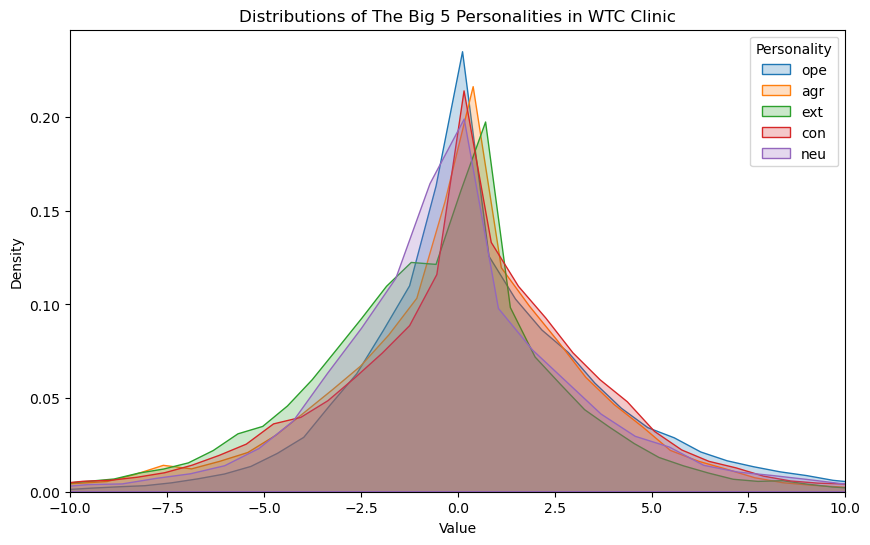

In [ ]:

plt.figure(figsize=(10, 6))
for col in ['ope', 'agr', 'ext', 'con', 'neu']:
    sns.kdeplot(seg_df[col], label=col, fill=True)

title_dataset = 'WTC Clinic' if dataset_name == 'wtc' else 'iHiTOP'
plt.title(f"Distributions of The Big 5 Personalities in {title_dataset}")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(title="Personality")
plt.xlim(-10, 10)
plt.show()

In [4]:
gt_emb_df = pd.read_csv(os.path.join(EMBEDDINGS_DIR, sbert_name, f'{dataset_name}_embeddings.csv'))
gt_emb_df

,segment_id,f000,f001,f002,f003,f004,f005,f006,f007,f008,...,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383
0,417-Q5-0,-0.075584,0.040513,0.087918,-0.061818,0.016908,0.054135,-0.043687,-0.032497,-0.080257,...,0.031678,-0.036200,0.033863,0.004600,0.063568,0.063140,0.052456,0.024611,0.053543,0.059069
1,417-Q5-1,0.010263,0.028935,0.052418,-0.054661,-0.052739,0.056436,-0.048300,-0.039810,-0.043792,...,0.000716,0.005423,0.080140,0.005369,0.030937,0.011622,0.058191,0.037399,0.026069,0.044603
2,417-Q5-2,0.015640,0.026896,0.055683,-0.039167,-0.044886,0.059167,-0.046924,-0.064981,-0.040909,...,-0.019591,-0.001969,0.043371,0.010914,0.013996,0.022936,0.057911,0.041148,0.008372,0.041009
3,417-Q5-3,-0.031706,0.083616,0.106976,-0.072090,-0.040272,-0.016612,0.007439,0.031125,-0.003797,...,0.045717,-0.090909,0.034390,0.020780,0.058275,0.102914,0.070823,0.082695,-0.009661,0.046030
4,417-Q5-4,0.011252,0.017688,0.103457,-0.013963,-0.037668,0.025187,-0.000924,-0.027211,0.025800,...,-0.080296,-0.086024,0.017136,0.019137,0.040391,-0.072536,0.018324,0.019036,0.066409,-0.091498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154598,1766--99-130,0.097473,0.091618,0.018798,0.020551,0.004536,0.019850,-0.027589,0.020975,0.079535,...,-0.026897,0.008701,0.066491,0.025070,-0.140160,0.039958,0.008782,-0.094962,-0.065360,0.065812
154599,1766--99-131,0.033504,0.096108,0.022334,0.002139,0.110668,0.023967,0.010173,0.026386,0.072415,...,0.044142,0.008134,0.115293,0.045375,-0.089254,0.018317,-0.010786,-0.040346,0.000643,0.046477
154600,1766--99-132,-0.034302,0.091456,0.080520,-0.039176,0.015758,-0.023656,0.001591,-0.009069,0.061610,...,0.031829,0.013746,0.113839,0.012622,-0.056482,0.069467,-0.053189,-0.016472,-0.035657,0.024322
154601,1766--99-133,-0.015464,0.014041,0.052497,0.033327,0.076290,-0.024053,-0.065092,-0.006300,0.003020,...,-0.065374,0.023941,0.036343,0.006751,-0.013511,0.067152,0.055123,0.009439,-0.089196,0.039081


In [5]:
emb_df = pd.read_csv(os.path.join(EMBEDDINGS_DIR, model_name, f'{dataset_name}_embeddings.csv'))
emb_df

,segment_id,f000,f001,f002,f003,f004,f005,f006,f007,f008,...,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383
0,417-Q5-0,-0.063016,0.062979,-0.003834,-0.042811,-0.044834,0.044998,0.062809,0.017743,-0.037425,...,-0.061327,-0.062988,-0.041755,-0.058920,-0.062111,0.046082,-0.045497,0.042655,0.059090,0.045681
1,417-Q5-1,-0.062845,0.063363,0.045818,-0.054645,-0.057403,-0.062132,0.055561,0.037693,-0.011775,...,-0.032267,-0.062768,0.061196,-0.059194,-0.058654,0.011106,-0.027266,0.024175,-0.001883,-0.012121
2,417-Q5-2,-0.063592,0.063668,0.057930,0.029774,-0.054520,-0.062618,-0.017276,0.017392,-0.031792,...,-0.062887,-0.063628,0.031500,-0.062143,-0.059418,-0.007447,0.013909,0.030412,0.028109,0.011879
3,417-Q5-3,-0.064713,0.064589,0.026382,-0.049021,0.051641,0.006483,0.064194,0.027357,-0.026552,...,-0.064612,-0.064676,0.013044,-0.064321,-0.047982,0.054308,0.003852,0.057678,0.059403,0.057077
4,417-Q5-4,-0.063147,0.062981,0.050898,-0.057334,-0.052188,0.057219,0.056573,0.062970,0.042175,...,-0.063138,-0.063010,0.041671,-0.063076,-0.029365,0.023049,0.023046,0.055715,0.047554,0.051778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154598,1766--99-130,-0.063785,0.063636,0.061719,-0.059634,-0.050580,-0.055727,0.060813,-0.030037,-0.059109,...,-0.063784,-0.062848,0.027441,-0.060904,-0.051987,0.034513,0.042486,0.061140,0.063767,0.060132
154599,1766--99-131,-0.061926,0.061333,0.061253,-0.054759,-0.051422,-0.019896,0.061883,0.028313,-0.052022,...,-0.061914,-0.060628,0.017226,-0.060574,-0.047638,0.058777,0.055304,0.054182,0.054131,0.056501
154600,1766--99-132,-0.063511,0.055030,0.009218,-0.061629,0.003232,-0.044075,0.063158,-0.044052,-0.035725,...,-0.063430,-0.062470,0.057232,-0.062355,-0.001925,0.050977,0.057941,0.057079,0.062967,0.062913
154601,1766--99-133,-0.056924,0.062372,-0.049176,-0.036854,-0.058791,-0.010485,-0.061341,0.033151,-0.044329,...,0.050286,0.051777,-0.061294,-0.062047,-0.061990,-0.019608,-0.014124,-0.004696,-0.058477,-0.056219


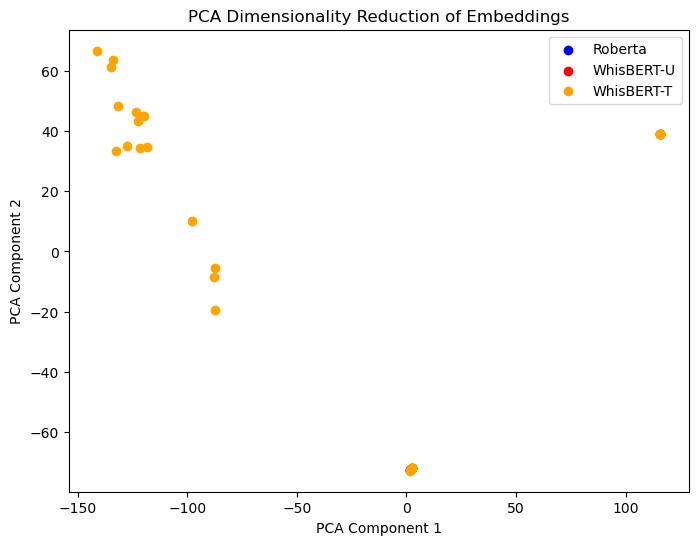

In [11]:
# Stack embeddings for PCA
all_embs = np.vstack([roberta_embs.numpy(), whisbert_u_embs.numpy(), whisbert_t_embs.numpy()])

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
reduced_embs = pca.fit_transform(all_embs)

# Split the reduced embeddings
reduced_roberta = reduced_embs[:4]
reduced_whisbert_u = reduced_embs[4:8]
reduced_whisbert_t = reduced_embs[8:]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_roberta[:, 0], reduced_roberta[:, 1], color='blue', label='Roberta')
plt.scatter(reduced_whisbert_u[:, 0], reduced_whisbert_u[:, 1], color='red', label='WhisBERT-U')
plt.scatter(reduced_whisbert_t[:, 0], reduced_whisbert_t[:, 1], color='orange', label='WhisBERT-T')

plt.title("PCA Dimensionality Reduction of Embeddings")
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

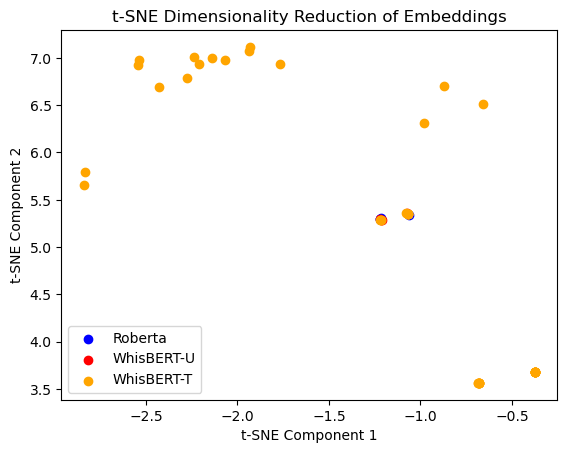

In [12]:
# Stack embeddings for t-SNE
all_embs = np.vstack([roberta_embs.numpy(), whisbert_u_embs.numpy(), whisbert_t_embs.numpy()])

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_embs = tsne.fit_transform(all_embs)

# Split the reduced embeddings
reduced_roberta = reduced_embs[:4]
reduced_whisbert_u = reduced_embs[4:8]
reduced_whisbert_t = reduced_embs[8:]

# Create scatter plot
# plt.figure(figsize=(8, 6))
plt.scatter(reduced_roberta[:, 0], reduced_roberta[:, 1], color='blue', label='Roberta')
plt.scatter(reduced_whisbert_u[:, 0], reduced_whisbert_u[:, 1], color='red', label='WhisBERT-U')
plt.scatter(reduced_whisbert_t[:, 0], reduced_whisbert_t[:, 1], color='orange', label='WhisBERT-T')

plt.title("t-SNE Dimensionality Reduction of Embeddings")
plt.legend()
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()